In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings


In [24]:
df=pd.read_excel('../data/raw/task_dataset.xlsx')
df.head()

,property_address,categories
0,"New Ppid 1Kqttmg7, House, Property Id No.58C57...",houseorplot
1,"Property Of Rs No.12/2,Plot No. 01,House Numbe...",houseorplot
2,"Flat-504,Floor-5 Shanti Vista-Ii Wing C Bldg 9...",flat
3,"Flat-103,Floor-1 Eshamya Florenza Tower L S No...",flat
4,Flat No G 532 I P Extension Patparganj 2Nd Flo...,flat


In [25]:
df.shape

(8936, 2)

In [26]:
df.columns

Index(['property_address', 'categories'], dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   property_address  8936 non-null   object
 1   categories        8936 non-null   object
dtypes: object(2)
memory usage: 139.8+ KB


In [28]:
df.describe()

,property_address,categories
count,8936,8936
unique,8607,5
top,Address:Nananarsy No 65 Sasthamangalam Village...,flat
freq,2,3232


In [29]:
df.isnull().sum()

property_address    0
categories          0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(329)

In [31]:
df['categories'].unique()

array(['houseorplot', 'flat', 'landparcel', 'others', 'commercial unit'],
      dtype=object)

In [32]:
# Data Quality Summary
print("DATA QUALITY REPORT")
print(f"\nMissing values percentage:")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Duplicate rows (all columns): {df.duplicated(keep=False).sum()}")

DATA QUALITY REPORT

Missing values percentage:
Series([], dtype: float64)

Duplicate rows: 329
Duplicate rows (all columns): 658


In [33]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (0): []
Categorical columns (2): ['property_address', 'categories']


In [34]:
# Categorical Features Analysis
for col in categorical_cols:
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

property_address
Address:Nananarsy No 65 Sasthamangalam Village, Trivandrum Taluk, Resy No 65, 240 M From Galaxy\n Apartments, 0, Trivandrum, Sasthamangalam, Sasthamangalam, Thiruvananthapuram, Thiruvananthapuram, Kerala,\n 695010    2
H No 99 Sawera Homes, Hadbast No 153, Khasra No13/19 4/2, 7 8 12/2 13, Vill Ayali Khurd, Ludhiana, Punjab,\n  India, \n  141001                                                                                          2
Ek Kitta Plot No 71A, Friends Colony, Khewat No 1082, Min Mushtil And Killa No 281//22/1/2(1-12),302//2/2/2/3(4-11),9/1(5-6),12/2(5-12),22/2/1/2(4-1), Rohtak, Rohtak, Haryana,\n  India, \n  124001                     2
Residential Bungalow, G+2 Floor On Plot No. 25/B, S.No. 200/3, Oppt. Somani\n Complex, Near Hanuman Mandir, Anad Ban, Close To Pimprale Road, At Pimprala,\n Tal. & Dist. Jalgaon 425001                                 2
Plot No. B-131-A, In Scheme R.K. Vatika City, Mohanpura Road, Village Vatika, Tehsil Sanganer,\n Jaipur    

<Axes: ylabel='categories'>

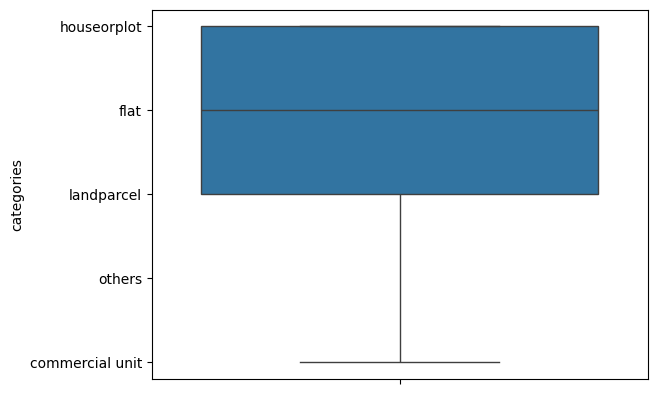

In [35]:
#Outliers visulisation
sns.boxplot(data=df,y='categories')

Text(0.5, 1.0, 'Word Length Distribution')

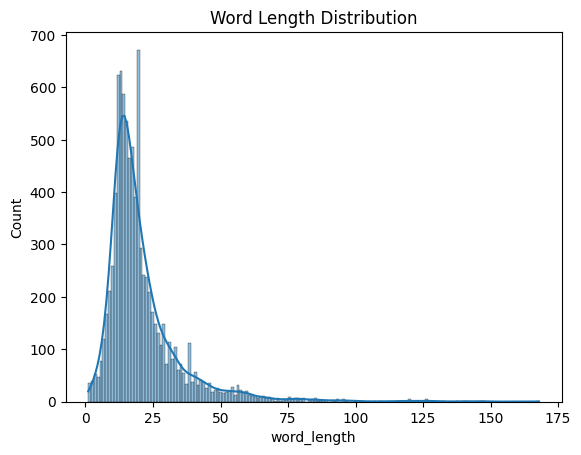

In [36]:
#Word length feature and distribution 
df['char_length'] = df['property_address'].str.len()
df['word_length'] = df['property_address'].apply(lambda x: len(x.split()))

sns.histplot(df['word_length'], kde=True)
plt.title("Word Length Distribution")

Text(0.5, 1.0, 'Word Length by Category')

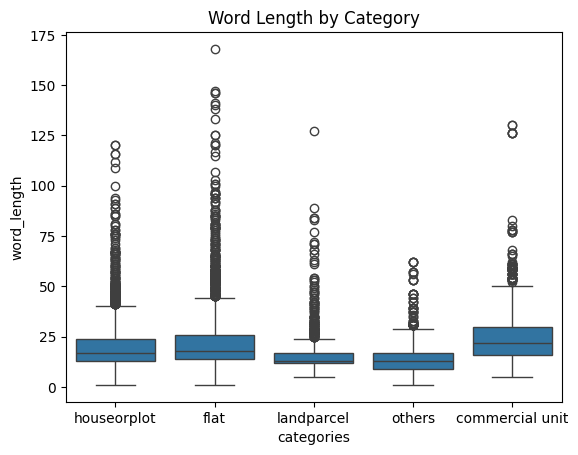

In [37]:
sns.boxplot(data=df, x='categories', y='word_length')
plt.title("Word Length by Category")

Text(0, 0.5, 'Count')

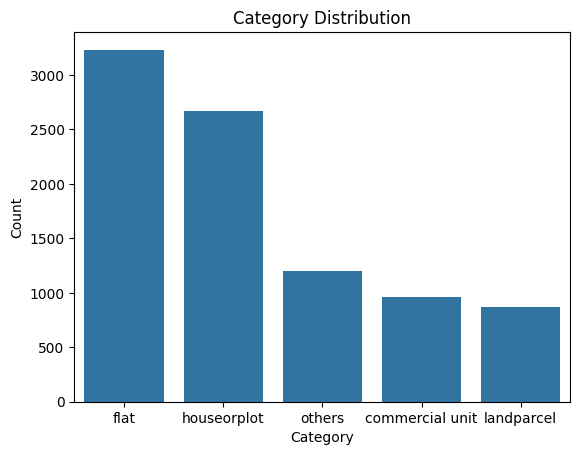

In [38]:
#Categorical Distribution 
sns.countplot(data=df, x='categories', order=df['categories'].value_counts().index)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")

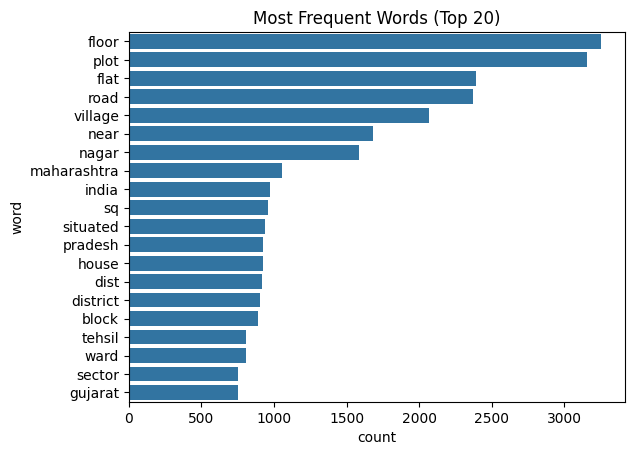

In [39]:
#Identifying Top words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
words = cv.fit_transform(df['property_address'])

word_freq = pd.DataFrame({
    'word': cv.get_feature_names_out(),
    'count': words.sum(axis=0).A1
}).sort_values(by='count', ascending=False)

sns.barplot(data=word_freq, x='count', y='word')
plt.title("Most Frequent Words (Top 20)")
plt.show()


**Observation**
1) The dataset contains 8936 rows and 2 columns with both categorical columns.
2) There are duplicate rows present, indicating repeated address entries.
3) No missing values were found in the text column.
4) Most Frequent is Flats 
5) Least Frequent is Landparcel,Commercial Units and Others 
6) Most Property address contains 5-25 words.
7) landparcel entries are longer.
8) Few entries are low which may represent noise 
9) Common high-frequency words include:
flat, floor, wing, tower, plot, house, shop, survey, no, property
10) EDA indicates that the dataset is well suited for supervised text classification.
The classes show distinct linguistic and structural patterns, especially in keywords, numeric identifiers, and text length.
Class imbalance should be managed, but feature richness suggests that classical NLP models (TF-IDF + SVM) and transformer models (e.g., DistilBERT) can achieve strong performance